Quick readout of data into one histogram. Very trivial

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/home/eric/sim/WWLegend/Output/Energies_all.csv'
df = pd.read_csv(file_path, sep=',', header=5)
# Initialize empty NumPy arrays for each column
column_arrays = [np.empty(df.shape[0], dtype=object) for _ in range(8)]

# Its doing fine just ignorring the first row for some reason

# Iterate over each column and fill the NumPy arrays
for i, column in enumerate(df.columns):
    # Split each entry using ';' and convert to NumPy arrays
    column_arrays[i] = df[column].apply(lambda x: np.array(str(x).split(';'))).values
Energies = column_arrays[0]

flattened_array = []
for subarray in Energies:
    subarray = subarray.astype(float)
    for number in subarray:
        flattened_array.append(number)


[178.379, 0.0023191, 437.316, 38.4566, 26.4645, 536.701, 1037.51, 677.598, 527.225, 636.244, 793.311, 0.00126478, 180.674, 1.17688, 4.82771e-06, 708.773, 667.083, 478.515, 253.528, 105.295, 859.67, 334.94, 5.44042e-05, 393.219, 0.000114186, 269.411, 98.2325, 443.373, 252.997, 914.371, 275.396, 224.666, 1.86418, 354.705, 17.7739, 3.48501, 7.05008e-05, 148.14, 32.1396, 59387.9, 463.339, 439.962, 0.0, 3.21796, 6.07207e-05, 818.551, 318.297, 0.0950959, 210.807, 55.7193, 0.00580348, 702.181, 444.974, 313.915, 164.972, 32.6146, 28.3056, 63.1851, 48.6392, 0.0, 351.239, 522.743, 486.027, 150.2, 67.7119, 64.7239, 0.0587728, 223.315, 0.00205243, 0.000450952, 873.528, 715.779, 2991.57, 83.6068, 373.349, 100.358, 111.223, 0.000742386, 5.66055e-05, 438.223, 342.762, 315.308, 544.084, 456.272, 124.752, 16.3991, 0.0958493, 0.000125602, 2.13203e-05, 701.71, 347.957, 1.87139, 551.856, 450.833, 11.6922, 0.00747244, 0.000461221, 311.139, 97.83, 45.3551, 18.7535, 273.188, 180.943, 0.0227781, 107.719, 45.5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


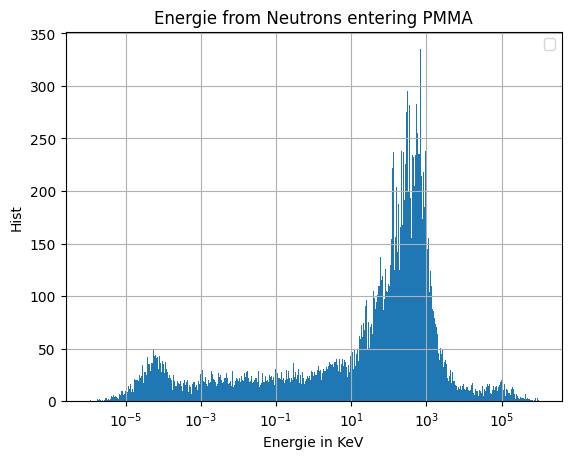

In [12]:
fig, ax = plt.subplots()

n_bins = 1000
rangeBins = (0, 100000)

ax.hist(flattened_array, bins=np.logspace(np.log10(1e-6),np.log10(1e6),n_bins))


ax.set_xlabel('Energie in KeV')
ax.set_ylabel('Hist')
ax.set_title('Energie from Neutrons entering PMMA')
ax.legend(loc= "upper right")
ax.set_xscale("log")
#ax.set_yscale("log")
ax.grid()

#plt.savefig("/home/eric/sim/WWLegend/Plots/Energies.png")
plt.show()

Save data in prefered format

In [5]:
# Header for the CSV file
header = ["Energies of Neutron entering PMMA for Ge77 Production in KeV"]

# Name of the CSV file
csv_file_name = '/home/eric/sim/WWLegend/Output/Energies_Formated.csv'


# Save the NumPy array to a CSV file
np.savetxt(csv_file_name, flattened_array, header='\t'.join(header), comments='', delimiter=',')